In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random

In [2]:
n = 300

x1 = np.random.normal(3, 1.2, n)
y1 = np.random.normal(2, 1.2, n)

x2 = np.random.normal(7, 1.2, n)
y2 = np.random.normal(4, 1.2, n)

x3 = np.random.normal(6, 1, n)
y3 = np.random.normal(0, 1, n)

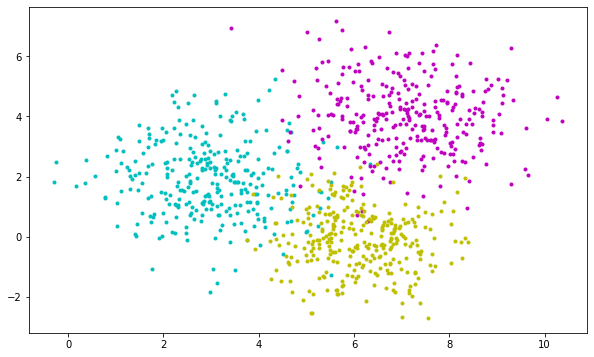

In [3]:
plt.figure(figsize = (10,6))

plt.plot(x1, y1, 'c.')
plt.plot(x2, y2, 'm.')
plt.plot(x3, y3, 'y.')

In [4]:
x = np.append(x1, [x2, x3])
y = np.append(y1, [y2, y3])
c = np.append(np.full(x1.shape, 1), [np.full(x2.shape, 2), np.full(x3.shape, 3)])

In [5]:
df = pd.DataFrame(list(zip(x, y, c)), columns =['x', 'y', 'c']) 
df

,x,y,c
0,3.974356,0.592972,1
1,0.569462,2.022288,1
2,1.557840,1.796068,1
3,1.394917,2.530366,1
4,3.969420,1.140161,1
...,...,...,...
895,6.623474,-0.288260,3
896,5.924700,-0.650485,3
897,6.331312,-0.798439,3
898,5.898275,-0.935889,3


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['c'], axis = 1), df['c'], test_size=0.2, stratify = df['c'])
y_train

30     1
654    3
378    2
467    2
161    1
      ..
806    3
481    2
592    2
109    1
647    3
Name: c, Length: 720, dtype: int64

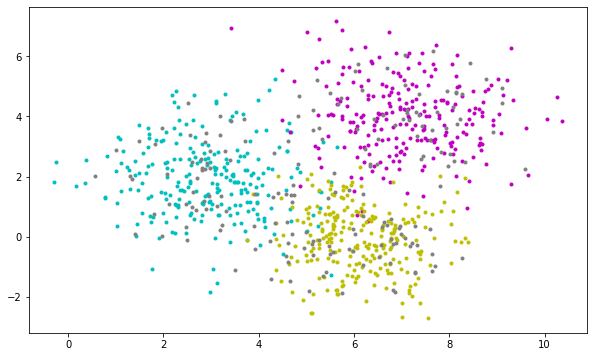

In [7]:
plt.figure(figsize = (10,6))
color = ['c', 'm', 'y']

plt.plot(X_train[y_train == 1]['x'], X_train[y_train == 1]['y'], 'c.')
plt.plot(X_train[y_train == 2]['x'], X_train[y_train == 2]['y'], 'm.')
plt.plot(X_train[y_train == 3]['x'], X_train[y_train == 3]['y'], 'y.')

plt.plot(X_test['x'], X_test['y'], '.', color = 'gray')

In [8]:
class knn():
    def __init__(self, k = 3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.x = X_train
        self.y = y_train
    
    def predict(self, X_test, y_test):
        y_pred = np.empty((X_test.shape[0], 1))
        
        for i in range(X_test.shape[0]):
            dists = np.empty((self.x.shape[0], 1))
            for j in range(self.x.shape[0]):
                dists[j] = np.linalg.norm(X_test.iloc[i] - self.x.iloc[j])
            
            k_nearest = self.y.iloc[np.argsort(dists, axis = 0)[:self.k].reshape(-1,)]
            
            (unique, counts) = np.unique(k_nearest, return_counts=True)
            frequencies = np.asarray((unique, counts)).T
            
            y_pred[i] = frequencies[:,0][np.argsort(frequencies[:,1])[-1]]
            
        return y_pred

In [9]:
clf = knn()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test, y_test)
y_pred.reshape((-1,))

array([3., 3., 2., 2., 3., 1., 3., 1., 2., 3., 1., 2., 2., 1., 2., 2., 3.,
       1., 3., 1., 1., 2., 1., 3., 2., 1., 1., 1., 1., 2., 2., 1., 1., 2.,
       1., 1., 3., 2., 2., 1., 2., 3., 2., 3., 1., 3., 2., 1., 3., 1., 2.,
       3., 3., 3., 3., 3., 3., 1., 1., 1., 2., 3., 3., 2., 1., 2., 3., 2.,
       1., 2., 2., 3., 3., 2., 3., 1., 3., 3., 2., 2., 3., 2., 1., 1., 1.,
       3., 3., 1., 1., 1., 2., 2., 1., 1., 3., 2., 2., 3., 2., 1., 3., 3.,
       3., 2., 1., 3., 1., 1., 2., 3., 2., 3., 3., 1., 2., 2., 2., 2., 3.,
       3., 1., 2., 1., 1., 2., 3., 2., 1., 3., 3., 1., 3., 1., 3., 1., 2.,
       1., 3., 1., 1., 2., 2., 3., 1., 2., 1., 1., 3., 3., 2., 3., 2., 3.,
       1., 3., 2., 2., 3., 1., 3., 3., 3., 2., 3., 3., 2., 2., 2., 3., 3.,
       1., 1., 3., 1., 2., 1., 1., 3., 2., 2.])

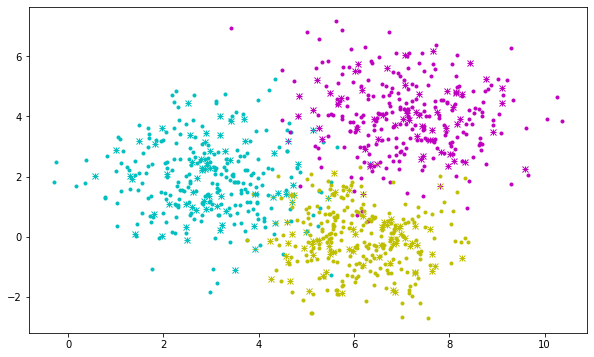

In [10]:
plt.figure(figsize = (10,6))

plt.plot(X_train[y_train == 1]['x'], X_train[y_train == 1]['y'], 'c.')
plt.plot(X_train[y_train == 2]['x'], X_train[y_train == 2]['y'], 'm.')
plt.plot(X_train[y_train == 3]['x'], X_train[y_train == 3]['y'], 'y.')

plt.plot(X_test[y_test == 1]['x'], X_test[y_test == 1]['y'], 'c+')
plt.plot(X_test[y_test == 2]['x'], X_test[y_test == 2]['y'], 'm+')
plt.plot(X_test[y_test == 3]['x'], X_test[y_test == 3]['y'], 'y+')

plt.plot(X_test[y_pred == 1]['x'], X_test[y_pred == 1]['y'], 'cx')
plt.plot(X_test[y_pred == 2]['x'], X_test[y_pred == 2]['y'], 'mx')
plt.plot(X_test[y_pred == 3]['x'], X_test[y_pred == 3]['y'], 'yx')

fun fact: it would work much faster if not using pandas dataframe (because .iloc slows model)

In [11]:
%%time
X_train['x']

Wall time: 0 ns


30     1.307846
654    5.948086
378    6.515376
467    8.064816
161    3.699124
         ...   
806    4.994824
481    7.269025
592    7.459661
109    3.508691
647    5.328960
Name: x, Length: 720, dtype: float64

In [12]:
%%time
X_train['x'].iloc[0:20]

Wall time: 995 µs


30     1.307846
654    5.948086
378    6.515376
467    8.064816
161    3.699124
43     4.651652
696    6.882050
304    4.652531
47     2.049873
270    2.868922
583    7.309895
453    5.633003
471    7.205787
603    5.574888
850    4.926787
819    7.262261
693    7.160102
711    5.860707
409    6.144333
666    6.586456
Name: x, dtype: float64

In [13]:
%%time
x[:20]

Wall time: 0 ns


array([ 3.97435581,  0.56946183,  1.55783976,  1.39491736,  3.96941989,
       -0.26439699,  2.07695937,  5.50926486,  2.5976309 ,  3.31917446,
        1.45668945,  1.47778241,  2.07381894,  3.43936864,  4.67684739,
        2.66882415,  3.16517622,  3.51000775,  4.56402526,  3.87776755])